In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [3]:
df1=pd.read_csv("/content/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape #no of coloums and rows

(13320, 9)

In [5]:
df1.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2=df1.drop(['area_type','availability','society','balcony'],axis='columns')
df2.shape
df2.head()



,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
df2.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df3=df2.dropna()     #remove null values
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(" ")[0])) #created new columns bhk

<ipython-input-10-f16e93c72b12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(" ")[0])) #created new columns bhk


In [11]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [13]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def is_float(x):
  try:
    float(x)
  except:
      return False
  return True

In [15]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [16]:
def convert(x):
  token=x.split('-')
  if len(token)==2:
    return(float(token[0])+float(token[1]))/2
  try:
    return float(x)
  except:
    return None

In [17]:
convert('2000 - 1300')

1650.0

In [18]:
df4=df3.copy()
df4['total_sqft']= df4['total_sqft'].apply(convert)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [19]:
df5=df4.copy()
df5['price_persqft']=round(df5['price']*100000/df5['total_sqft'],2)
df5.head()

,location,size,total_sqft,bath,price,bhk,price_persqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [20]:
len(df5['location'].unique())

1304

In [21]:
location_stats=df5.groupby('location')['location'].count().sort_values(ascending=False)
location_stats

location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [22]:
len(location_stats[location_stats<=10])
loc_stat_10=location_stats[location_stats<=10]
loc_stat_10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [23]:
df5.location= df5.location.apply(lambda x: 'Other'if x in loc_stat_10 else x)
len(df5.location.unique())
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_persqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.86
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.06
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.82
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.24
9,Other,6 Bedroom,1020.0,6.0,370.00,6,36274.51


In [24]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_persqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,Other,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,Other,3 Bedroom,500.0,3.0,100.0,3,20000.00


In [25]:
df5.shape


(13246, 7)

In [26]:
df6=df5.copy()
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape


(12502, 7)

In [27]:
def remove_outliers(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby("location"):
    m=np.mean(subdf.price_persqft)
    n=np.std(subdf.price_persqft)
    reduced_df=subdf[(subdf.price_persqft>(m-n))& (subdf.price_persqft<=(m+n))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df7=remove_outliers(df6)
df7.shape

(10244, 7)

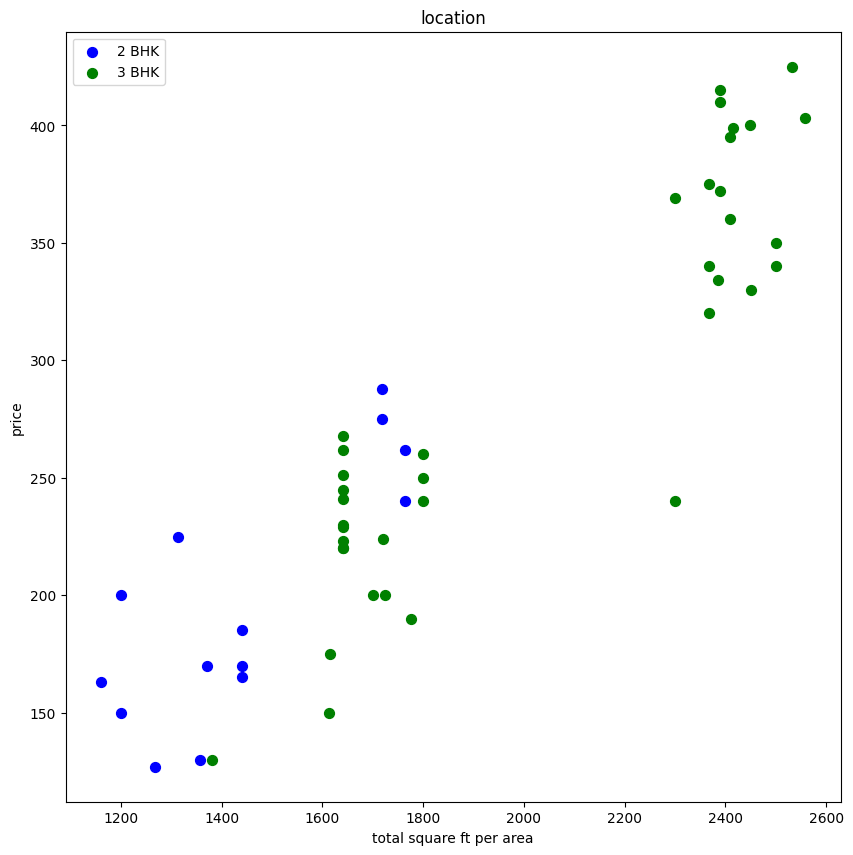

In [28]:
def plot_scatter(df, location):
  bhk2=df[(df.location==location)&(df.bhk==2)]
  bhk3=df[(df.location==location)&(df.bhk==3)]
  matplotlib.rcParams['figure.figsize']=(10,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3 BHK',s=50)
  plt.xlabel("total square ft per area")
  plt.ylabel("price")
  plt.title("location")
  plt.legend()
plot_scatter(df7,"Rajaji Nagar")

In [29]:
def remove_outliers(df):
 exclude_indicies=np.array([])
 for location,location_df in df.groupby('location'):
  bhk_stats={}
  for bhk,bhk_df in location_df.groupby('bhk'):
    bhk_stats[bhk]={
        'mean': np.mean(bhk_df.price_persqft),
        'std':np.std(bhk_df.price_persqft),
        'count':bhk_df.shape[0]
    }
  for bhk,bhk_df in location_df.groupby('bhk'):
    stats=bhk_stats.get(bhk-1)
    if stats and stats['count']>5:
      exclude_indicies=np.append(exclude_indicies,bhk_df[bhk_df.price_persqft<(stats['mean'])].index.values)
 return df.drop(exclude_indicies,axis='index')

In [30]:
df8= remove_outliers(df7)
df8.shape


(7342, 7)

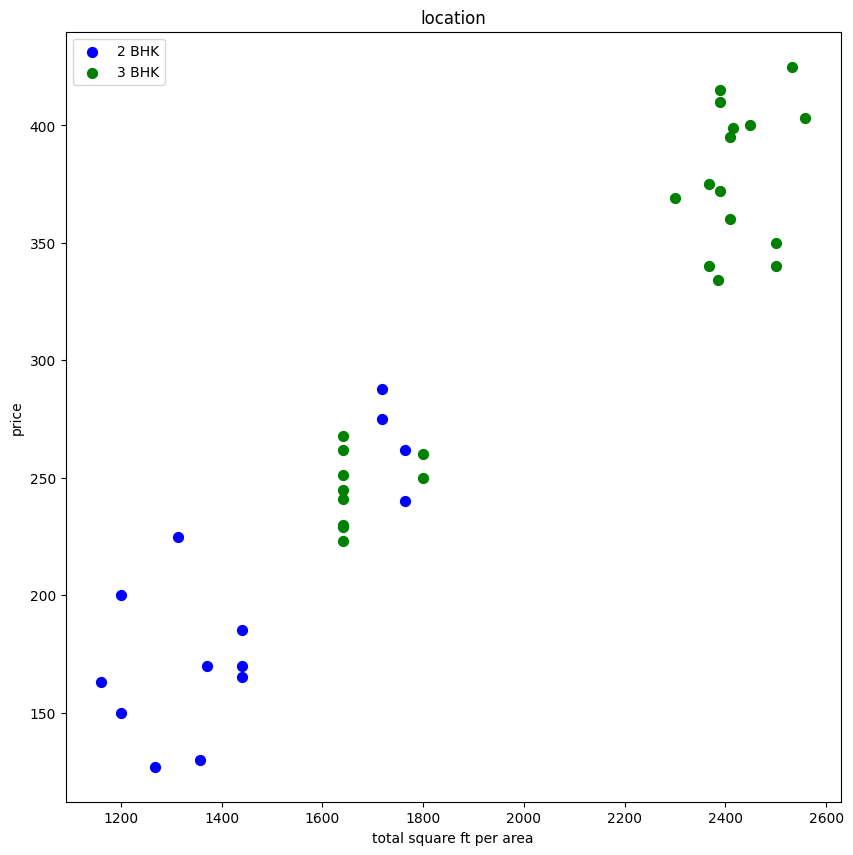

In [31]:
plot_scatter(df8,"Rajaji Nagar")


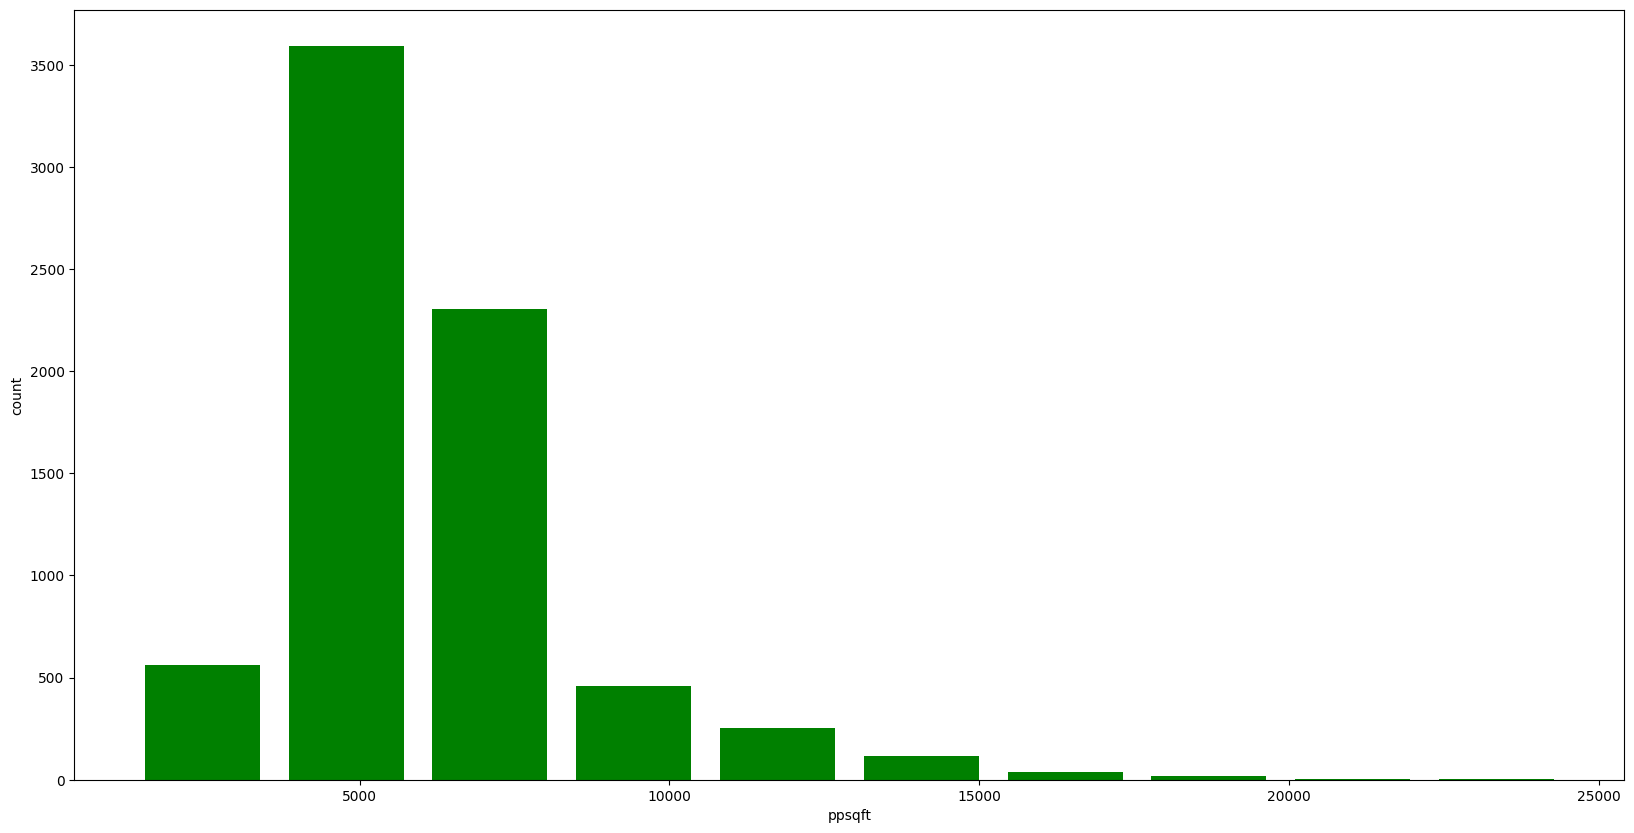

In [32]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_persqft,color='green',rwidth=0.8)
plt.xlabel("ppsqft")
plt.ylabel("count")
plt.show()

In [33]:
df8.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

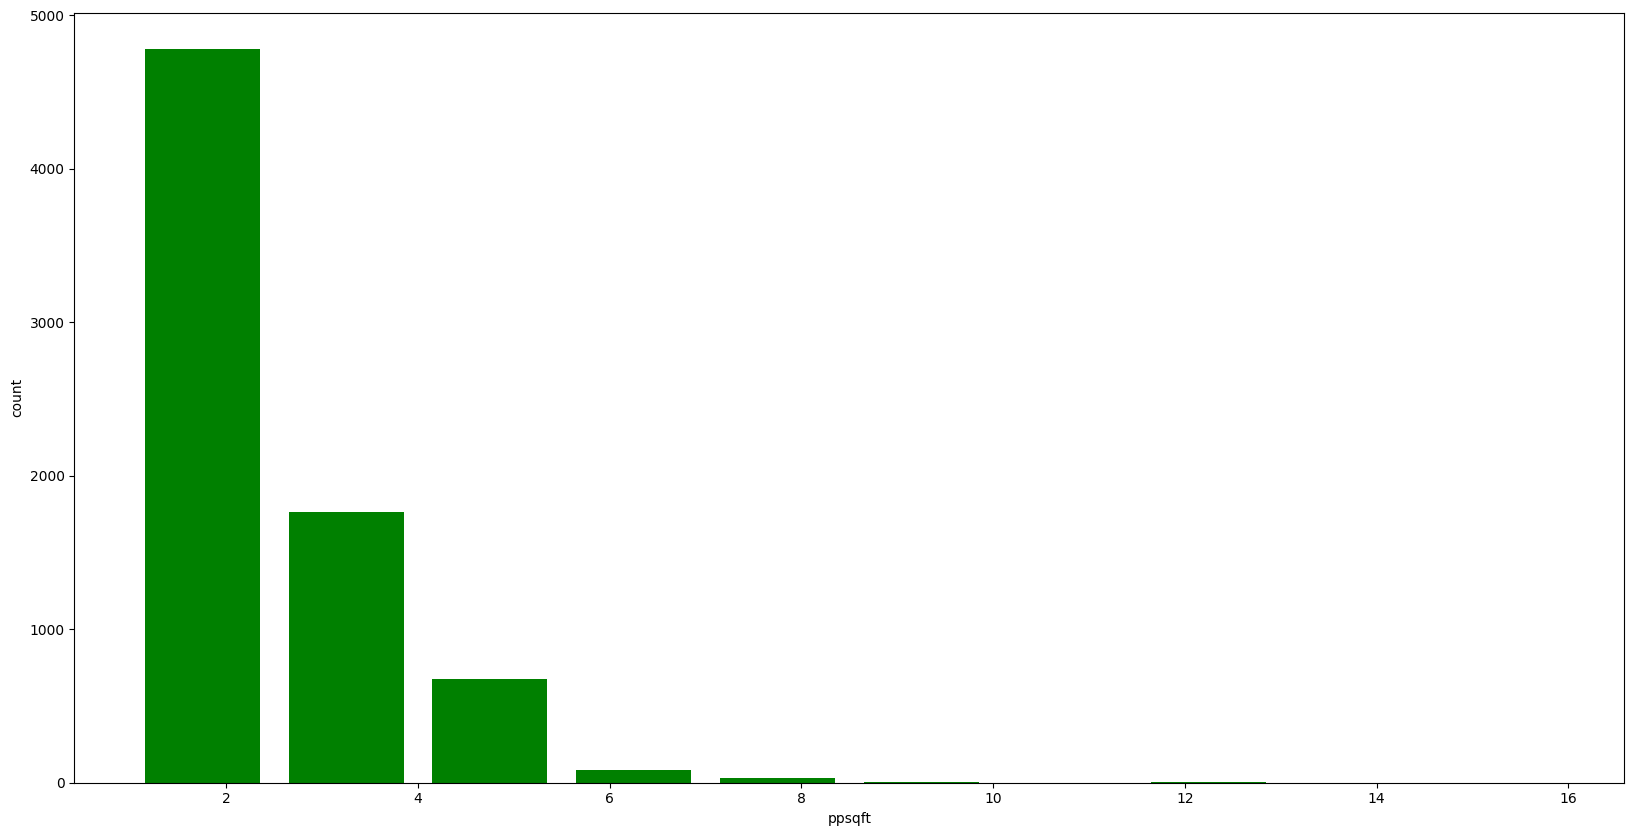

In [34]:
plt.hist(df8.bath,color='green',rwidth=0.8)
plt.xlabel("ppsqft")
plt.ylabel("count")
plt.show()

In [35]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_persqft
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
5232,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.57
5848,Other,6 BHK,11338.0,9.0,1000.0,6,8819.90
9016,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03


In [36]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(7264, 7)

In [37]:
df10=df9.drop(['size','price_persqft'],axis='columns')
df10.head(45)

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.00,2
2,Devarachikkanahalli,1200.0,2.0,83.00,2
3,Devarachikkanahalli,1170.0,2.0,40.00,2
4,Devarachikkanahalli,1425.0,2.0,65.00,3
5,Devarachikkanahalli,947.0,2.0,43.00,2
6,Devarachikkanahalli,1130.0,2.0,36.00,2
7,Devarachikkanahalli,1417.0,2.0,76.00,3
8,Devarachikkanahalli,1230.0,2.0,58.00,2
9,Devarachikkanahalli,1705.0,3.0,75.00,3
10,Devarachikkanahalli,1116.0,2.0,47.00,2


In [38]:
dummies=pd.get_dummies(df10.location)
dummies.head()

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
df11=pd.concat([df10,dummies.drop('Other', axis='columns')], axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,83.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,65.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Devarachikkanahalli,947.0,2.0,43.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df12=df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,83.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,40.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,65.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,43.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
df12.shape

(7264, 245)

In [42]:
X=df12.drop('price',axis='columns')
X.head()


,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
y=df12.price
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,y,test_size=0.2 ,random_state=10)

In [45]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train,Y_train)
model1.score(X_train,Y_train)

0.8541509153159723

In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)


array([0.85015087, 0.85327657, 0.88701488, 0.79792361, 0.80742688])

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
def find_best_model(X,y):
  algos={
      'linear regression':{
          'model': LinearRegression(),
          'params':{
              'fit_intercept': [True, False]
          }
      },
      'lasso':{
          'model': Lasso(),
          'params':{
              'alpha':[1,2],
              'selection':['random','cyclic']
          }
      },
      'desicion tree':{
          'model': DecisionTreeRegressor(),
          'params':{
              'criterion':['mse','friedman_mse'],
              'splitter':['best','random']
          }
      }
  }
  scores=[]
  cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
  for algos_name,config in algos.items():
    gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
    gs.fit(X,y)
    scores.append({
        'model':algos_name,
        'best_score':gs.best_score_,
        'best_params':gs.best_params_
    })
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model(X,y)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear regression,0.839277,{'fit_intercept': False}
1,lasso,0.720656,"{'alpha': 1, 'selection': 'random'}"
2,desicion tree,0.677068,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [48]:
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
def predict_price(location,sqft,bath,bhk):
  loc_index=np.where(X.columns==location)[0][0]

  p=np.zeros(len(X.columns))
  p[0]=sqft
  p[1]=bath
  p[2]=bhk
  if loc_index>=0:
    p[loc_index]=1
  return model1.predict([p])[0]


In [50]:
predict_price('1st Phase JP Nagar',1000,2,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


89.4654882367487

In [51]:
predict_price('2nd Stage Nagarbhavi',1000,5,2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


204.80851744902677

In [57]:
from google.colab import files
import pickle
import os
with open('Bengaluru_House_Data.pickle','wb') as f:
  pickle.dump(model1,f)
print(os.getcwd())
files.download('Bengaluru_House_Data.pickle')

/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
  f.write(json.dumps(columns))
print(os.getcwd())
files.download('columns.json')

/content


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>